# Task 0

## Question 1

In [1]:
import pandas as pd # use pandas to import two csv 
from scipy import stats
df = pd.read_csv('mp1_av_disengagements.csv') 
df1 = pd.read_csv('mp1_av_totalmiles.csv')



## Question 2

### a.

In [2]:
# use sum() to calculate total number of AV disengagements over the entire duration
df1['total number of disengagements'].sum() 

1024

### b.

In [3]:
#nuique() gives number of unique value in Month columns(excluding null values)
df['Month'].nunique()

15

### c.

In [4]:
# unique() returns all the unique entries 
df.Month.unique()

array(['14-Sep', '14-Oct', '14-Nov', '14-Dec', '15-Jan', '15-Feb',
       '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul', '15-Aug',
       '15-Sep', '15-Oct', '15-Nov'], dtype=object)

### d.

In [5]:
#nunique() returns number of unique value in specific columns 
df['Cause'].nunique()

10

### e.

In [6]:
# isnull() is used to detect any missing values
# sum() is used to calculate number of missing values for each attribute
print('av_disengagement.csv has ' + str(sum(df.isnull().sum())) + " NA values") # for df imported from av_disengagement.csv
print('totalmiles.csv has ' + str(sum(df1.isnull().sum())) + " NA values") # for df1 imported from totalmiles.csv



av_disengagement.csv has 532 NA values
totalmiles.csv has 0 NA values


## Question 3

In [7]:
# plot based on Cause attribute, so use groupby() by this attribute
# autopct() to show percentage
plot = df.groupby(['Cause']).size().plot.pie(y = 'Cause',autopct='%1.1f%%',shadow = True)
plot.legend(loc='center left', bbox_to_anchor=(1.5, 0.5)) # show legend 
plot.set_title('Causes of AV disengagement') # set title
plot

### Based on pie chart, the top 2 cause are "Unwanted Driver Discomfort" and "Recklessly behaving agent"

## Question 4

In [8]:
# group the data by month
trend_df = df1.groupby(['Month'],sort = False)[['miles driven in autonomous mode','total number of disengagements']].sum()


Text(0,0.5,'disengagement per mile')

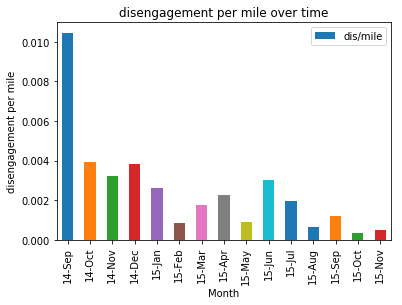

In [9]:
# create disengagement/mile entries coresponding to each month
trend_df['dis/mile'] = trend_df['total number of disengagements']/ trend_df['miles driven in autonomous mode']
# plot the disengagement/mile over every months to see the trend 
trend = trend_df.plot.bar(y = 'dis/mile',title = 'disengagement per mile over time')
trend.set_ylabel('disengagement per mile')


#### Conclusion: In general, total number of disengagement per mile is decreasing over time.  The AV is seemingly maturing over time.

# Task 1

## Question 1

### a.

### Gaussian distribution :  large amount of samples fall close to the mean, a few amount of samples are some deviation away from the mean



### b.Exponential distribution: events occur continuously and independently at a constant rate, where the samples lie are independent from time.
     

### c. Weibull distribution: the failure rate is proportional to a power of time. Large amount of samples will be centered around a certain point.

## Question 2

Text(0.5,1,'probability distribution of reaction time')

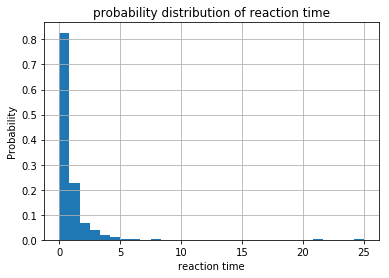

In [10]:
# plot the probability distribution of reactionTime 
# use hist() to plot histogram and range() to better show general trend
his_reaction = (df['ReactionTime']).hist(bins = 30,density = True)
his_reaction.set_xlabel('reaction time')
his_reaction.set_ylabel('Probability')
his_reaction.set_title('probability distribution of reaction time')

### This distirbution fits a welbuli distribution.This signifies that It is common to see a large amount of reaction time happen within a small interval(0-2 seconds), and after that, as time increases, it is very unlikely, though not impossible, to see some other samples with long reaction time.

## Question 3

### a.

In [11]:
# mean() gives the mean of the given attribute
# since no restriction is made, this returns mean of reaction time over entire duration
df['ReactionTime'].mean()

0.9297703252032526

### b.

In [12]:
# use nunique() figure out how many unique locations in the dataset
df['Location'].nunique()
# figure out average reaction time at each location
highway_mean = df[df['Location'] == 'highway']['ReactionTime'].mean()
urban_mean = df[df['Location'] == 'urban-street']['ReactionTime'].mean()


## Question 4

In [13]:
stats.ttest_1samp(df['ReactionTime'].dropna(),1.09) 
# ttest_1samp is provides t statistics and two-tailed p value for one sample t-test

Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

### Based on the result from 1 sample t test, the two-tailed p value is smaller than 0.5, which means we should reject the null, therefore, the mean reaction time is different for humans in AV cars than in non-AV cars.


## Question 5

Text(0.5,1,'disengagement per mile with monthly granularity')

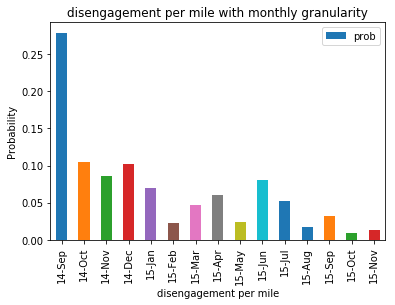

In [14]:
# plot the disengagement per mile with monthly granularity
trend_df['prob'] = trend_df['dis/mile'] / sum(trend_df['dis/mile'])
trend_dis = trend_df.plot.bar(y = 'prob',title = 'probability distribution disengagement per mile over time')
trend_dis.set_xlabel('disengagement per mile')
trend_dis.set_ylabel('Probability')
trend_dis.set_title('disengagement per mile with monthly granularity')

### Based on the bar plot above, it is very close to exponential(also welbuli with adaquate parameters) distribution.if samples are drawn from a random variable that follows the exponential distribution, the samples tell us the likelihood of the result of an experiement is memoryless and will decrease fast at the beginning and get slow down as the time increase, and it will converge to 0. So this signifies that the dis/mile will become fewer in the future theortically which is a nice thing.


In [15]:
df

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions
5,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.88,Incorrect Traffic Light Detection
6,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.41,Emergency Vehicle
7,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.45,Emergency Vehicle
8,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.07,Software Froze
9,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.37,Hardware Fault


In [16]:
df1

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30
5,15-Feb,WDD2221851A001072,18745,16,8,8
6,15-Mar,WDD2221851A001072,22204,39,31,8
7,15-Apr,WDD2221851A001072,31927,72,51,21
8,15-May,WDD2221851A001072,38017,34,11,23
9,15-Jun,WDD2221851A001072,42047,127,58,69


# Task2

## Question1

In [17]:
# Since this is just n (miles) independent Bernouli trails, we can model them by binomial distirbution, 
# so in general P should be # of success(disengament) / # of trails(miles)
car_weather_type = df.groupby(['Weather','TypeOfTrigger']).size().unstack()
car_miles_and_dis = df1.sum()
cloud_miles = car_miles_and_dis.iloc[2] * 0.28
clear_miles = car_miles_and_dis.iloc[2] * 0.72
p_dis_clear = car_weather_type.iloc[0].sum() / clear_miles
p_dis_cloud = car_weather_type.iloc[1].sum() / cloud_miles
p_dis_clear_auto = car_weather_type.iloc[0]['automatic'] / clear_miles
p_dis_cloud_auto = car_weather_type.iloc[1]['automatic'] / cloud_miles

In [18]:
# b:
p_dis_cloud = car_weather_type.iloc[1].sum() / cloud_miles
p_dis_cloud

0.005902556775527249

In [19]:
# c:
p_dis_clear = car_weather_type.iloc[0].sum() / clear_miles
p_dis_clear

0.0005195663748517998

In [20]:
# d:
p_dis_clear_auto = car_weather_type.iloc[0]['automatic'] / clear_miles
p_dis_cloud_auto = car_weather_type.iloc[1]['automatic'] / cloud_miles
print(p_dis_clear_auto,p_dis_cloud_auto)

0.00026390673008345393 0.0028063653172267283


In [21]:
# e 
# using binomial distribution to calculate the p value(which is the calculated probability of X >= 150 / 10000 given p) to obtain the probability we want
stats.binom_test(x= 150 , n = 10000, p = p_dis_cloud,alternative= 'greater' )

1.987144942327803e-23

## Question2

In [22]:
# using one-sided binomial test; p value is very small, so reject nulll, so weather plays an important role for AVs
stats.binom_test(x= len(df[df['Weather'] == 'cloudy'].index), n = len(df), p = 0.28,alternative= 'greater' )

4.438051320043669e-278

## Question3

In [23]:
reac_cloud = df[df['Weather'] == 'cloudy']['ReactionTime'].dropna()
reac_clear = df[df['Weather'] == 'clear']['ReactionTime'].dropna()
p_cloud_reac = sum(reac_cloud > 0.5) / len(reac_cloud)
p_clear_reac = sum(reac_clear > 0.7) / len(reac_clear)


## Question4

In [24]:
#4 using law of probability P(accident) = P(accident,clear) + P(accident,cloudy)(all of these assume automatic disengagement)
p_av_accident = p_dis_clear_auto * p_clear_reac + p_dis_cloud_auto * p_cloud_reac

In [25]:
p_av_accident

0.001625371989602863

## Question5

In [28]:
p_av_accident / 2e-6
# it's about 250 times more dangerous than human driver, so the Avs tech still needs to be improved

812.6859948014315